In [1]:
import numpy as np
from sklearn import datasets

In [57]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target


In [4]:
np.unique(y)

array([0, 1, 2])

In [60]:
np.random.seed(0)
indecies = np.random.permutation(len(iris_X))

iris_X_train = iris_X[indecies[:-10]]
iris_y_train = iris_y[indecies[:-10]]
iris_X_test = iris_X[indecies[-10:]]
iris_y_test = iris_y[indecies[-10:]]

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(iris_X_train,iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
knn_clf.predict(X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [8]:
y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [42]:
diabetes = datasets.load_diabetes()
dia_X_train = diabetes.data[:-20]
dia_X_test = diabetes.data[-20:]
dia_y_train = diabetes.target[:-20]
dia_y_test = diabetes.target[-20:]

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
lr.coef_

array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01])

In [15]:
# 均方误差
np.mean((lr.predict(X_test)-y_test)**2)

2004.5676026898211

In [18]:
# 方差分数：1 是完美的预测
# 0 意味着 X 和 y 之间没有线性关系。
lr.score(X_test,y_test)

0.5850753022690574

In [20]:
X = np.c_[.5,1].T
y = [.5,1]

In [23]:
np.c_[.5,1]

array([[0.5, 1. ]])

In [24]:
print(X)
print(y)

[[0.5]
 [1. ]]
[0.5, 1]


In [25]:
test = np.c_[0,2].T

In [26]:
lr = LinearRegression()

In [27]:
import matplotlib.pyplot as plt

In [28]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [29]:
np.random.seed(0)

In [33]:
np.random.normal(size=(2,1))

array([[ 0.95008842],
       [-0.15135721]])

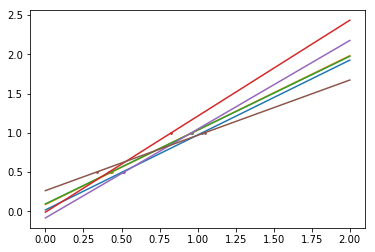

In [38]:
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2,1)) + X#加noise
    lr.fit(this_X,y)
    plt.plot(test,lr.predict(test))
    plt.scatter(this_X,y,s=3)

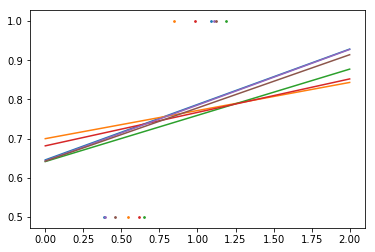

In [40]:
from sklearn.linear_model import Ridge
rr = Ridge()
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2,1)) + X#加noise
    rr.fit(this_X,y)
    plt.plot(test,rr.predict(test))
    plt.scatter(this_X,y,s=3)

In [41]:
alphas = np.logspace(-4,-1,6)
alphas

array([0.0001    , 0.00039811, 0.00158489, 0.00630957, 0.02511886,
       0.1       ])

In [44]:
print([rr.set_params(alpha=alpha).fit(dia_X_train,dia_y_train).score(dia_X_test,dia_y_test) for alpha in alphas])

[0.5851110683883534, 0.5852073015444677, 0.5854677540698493, 0.5855512036503916, 0.5830717085554163, 0.5705899943728011]


In [46]:
from sklearn.linear_model import Lasso

In [49]:
lass_rg = Lasso()

scores = [lass_rg.set_params(alpha=alpha).fit(dia_X_train,dia_y_train).score(dia_X_test,dia_y_test) for alpha in alphas]

In [50]:
best_alpha = alphas[scores.index(max(scores))]

In [51]:
best_alpha

0.025118864315095794

In [53]:
best_score = max(scores)
best_score

0.5887622418309261

In [54]:
lass_rg.set_params(alpha=best_alpha).fit(dia_X_train,dia_y_train).score(dia_X_test,dia_y_test)

0.5887622418309261

In [55]:
from sklearn.linear_model  import LogisticRegression

In [64]:
log_reg =LogisticRegression(solver='lbfgs', C=1e5,multi_class='multinomial')

In [65]:
log_reg.fit(iris_X_train,iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [66]:
from sklearn.svm import SVC

In [67]:
svc = SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)